<a href="https://colab.research.google.com/github/Bosxs/Price-Prediction-of-Used-Cars/blob/master/Copy_of_Price_prediction_of_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Price prediction of used cars**



#Import libraries

---



In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

traindata = pd.read_csv('https://raw.githubusercontent.com/Bosxs/Price-Prediction-of-Used-Cars/master/train-data.csv')
testdata = pd.read_csv('https://raw.githubusercontent.com/Bosxs/Price-Prediction-of-Used-Cars/master/test-data.csv')

# Data Overview

---



In [189]:
traindata.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [190]:
testdata.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [191]:
traindata.shape

(6019, 14)

In [192]:
testdata.shape

(1234, 13)

In [193]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [194]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


### **Columns with objects as data types needs to take numerical data types**

#Data cleaning and Featuring engineering

In [195]:
traindata.isnull().values.sum()

5311

In [196]:
traindata.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [197]:
testdata.isnull().values.sum()

1083

In [198]:
#Number of nulls in a column
testdata.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [199]:
#Removing the first column unnamed from the traindata and testdata. This is basically just indexing the rows
traindata = traindata.iloc[:,1:]
testdata = testdata.iloc[:,1:]

#dropping of New_Price since it is not relevant for the model
# New_Price column need to be dropped since it has too many missing values. missing values in other columns can be imputed.
traindata = traindata.drop(columns=['New_Price'],axis=1)
testdata = testdata.drop(columns = ['New_Price'], axis = 1)

In [200]:
traindata.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [201]:
testdata.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [202]:
traindata = traindata.dropna(how = 'any')
testdata = testdata.dropna(how = 'any')

In [203]:
#after the removal of nulls in the column
traindata.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [204]:
testdata.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [205]:
traindata.shape

(5975, 12)

In [206]:
traindata.duplicated().sum()

0

In [207]:
testdata.duplicated().sum()

1

In [208]:
testdata = testdata.drop_duplicates()

In [209]:
testdata.duplicated().sum()

0

In [210]:
testdata.shape

(1222, 11)

In [211]:
## creating Brand and Model columns from Name to make it more understandable
traindata['Name'] = traindata['Name'].astype(str)

traindata['Brand'] = traindata['Name'].str.split(' ').str[0]
traindata['Model'] = traindata['Name'].str.split(' ').str[1]


#Doing same to the testdata
testdata['Name'] = testdata['Name'].astype(str)

testdata['Brand'] = testdata['Name'].str.split(' ').str[0]
testdata['Model'] = testdata['Name'].str.split(' ').str[1]

<ipython-input-211-ac6b64b06ad2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-211-ac6b64b06ad2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [212]:
traindata.drop(columns=['Name'], axis=1, inplace=True)
testdata.drop(columns=['Name'], axis=1, inplace=True)

# Visualization

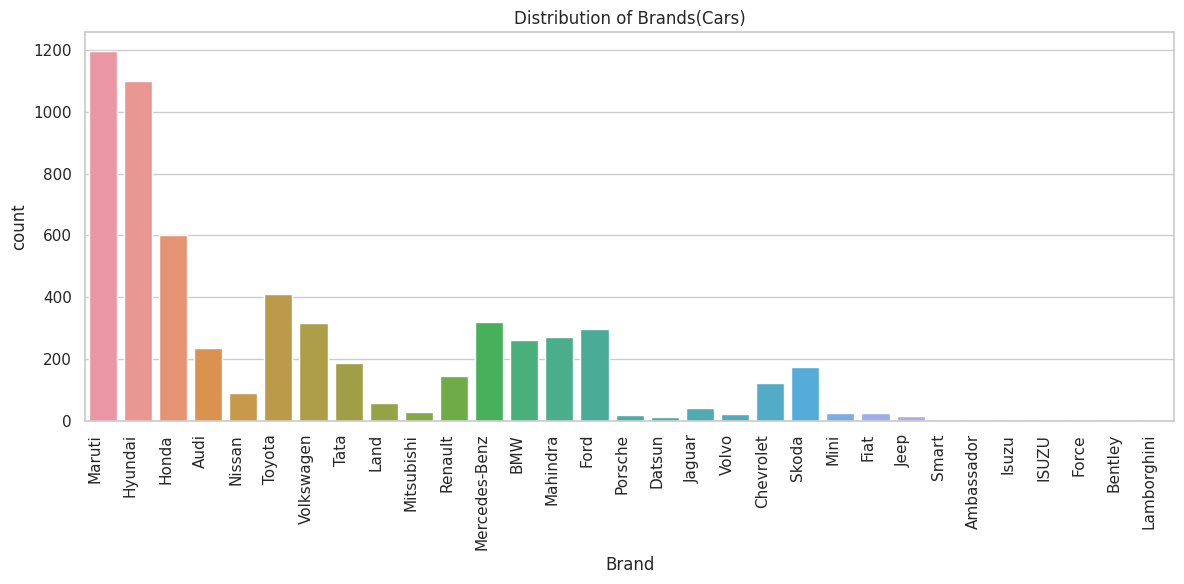

In [213]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='Brand', data=traindata)
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of Brands(Cars)')
plt.tight_layout()
plt.show()

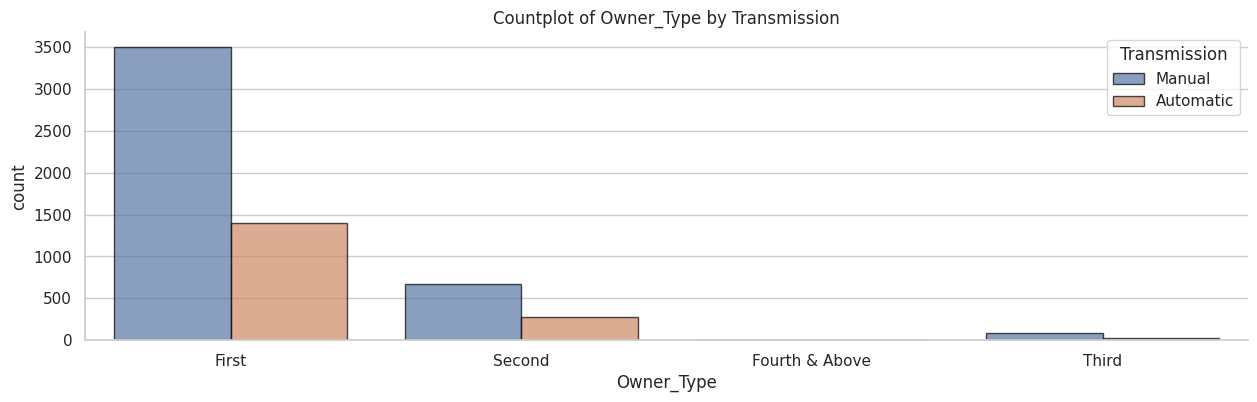

In [214]:
plt.figure(figsize=[15, 4])
sns.countplot(x='Owner_Type', hue='Transmission', edgecolor="black", alpha=0.7, data=traindata)
sns.despine()
plt.title("Countplot of Owner_Type by Transmission")
plt.show()

In [215]:
import plotly.express as px
## Distrbution of kilometers Driven
px.box(x=traindata['Kilometers_Driven'])

In [216]:
##The outlier needs to be removed
traindata = traindata.query('Kilometers_Driven < 400000')

In [217]:
px.box(x=traindata['Kilometers_Driven'])

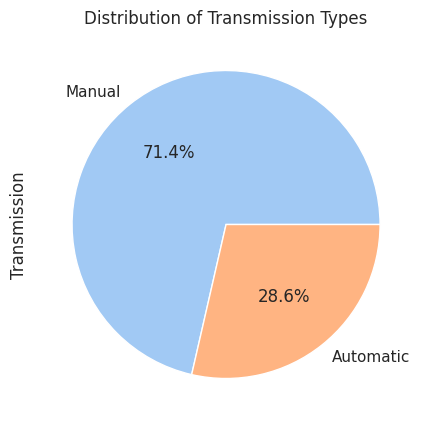

In [218]:
plt.figure(figsize=(5, 5))
traindata['Transmission'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Transmission Types')
plt.show()

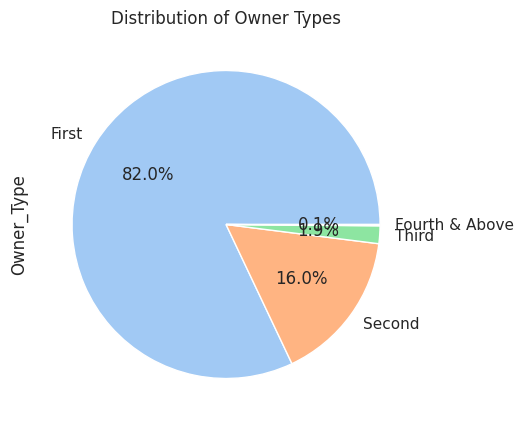

In [219]:
plt.figure(figsize=(5, 5))
traindata['Owner_Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Owner Types')
plt.show()

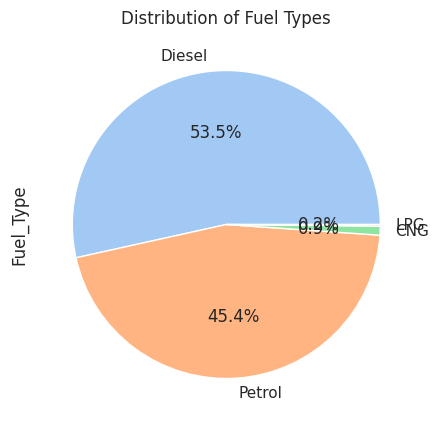

In [220]:
plt.figure(figsize=(5, 5))
traindata['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Fuel Types')
plt.show()

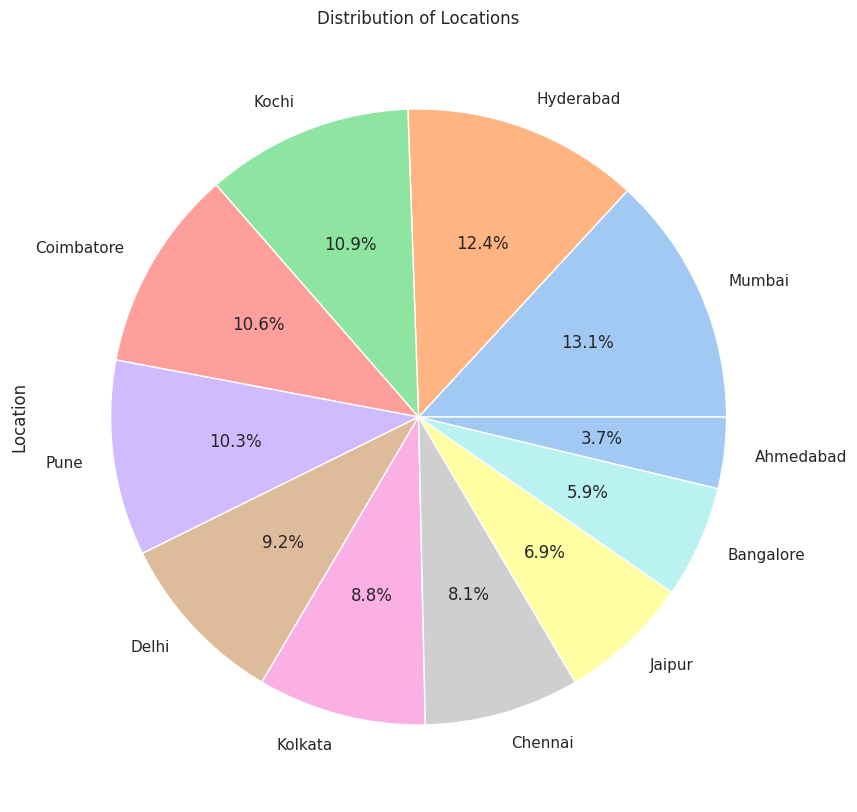

In [221]:
plt.figure(figsize=(10, 10))
traindata['Location'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title('Distribution of Locations')
plt.show()

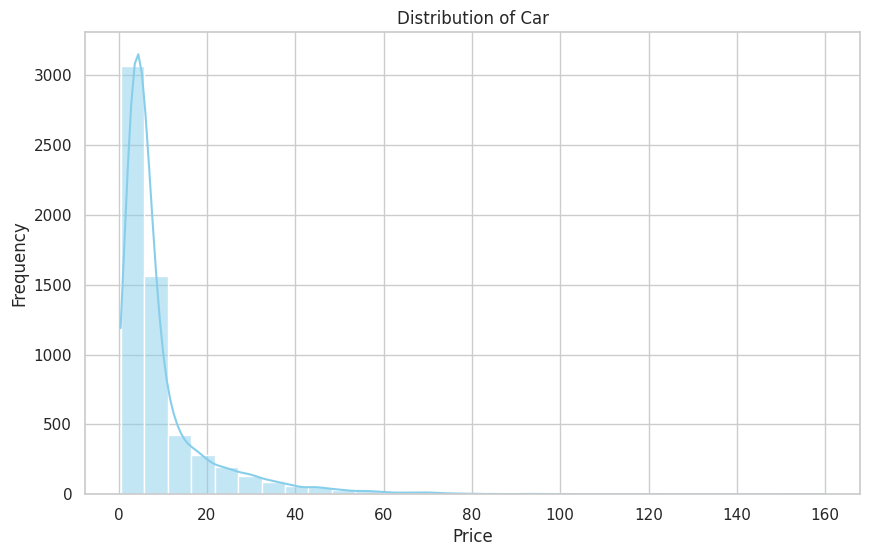

In [222]:
plt.figure(figsize=(10, 6))
sns.histplot(traindata['Price'], bins=30, kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car')
plt.show()

<Figure size 1200x800 with 0 Axes>

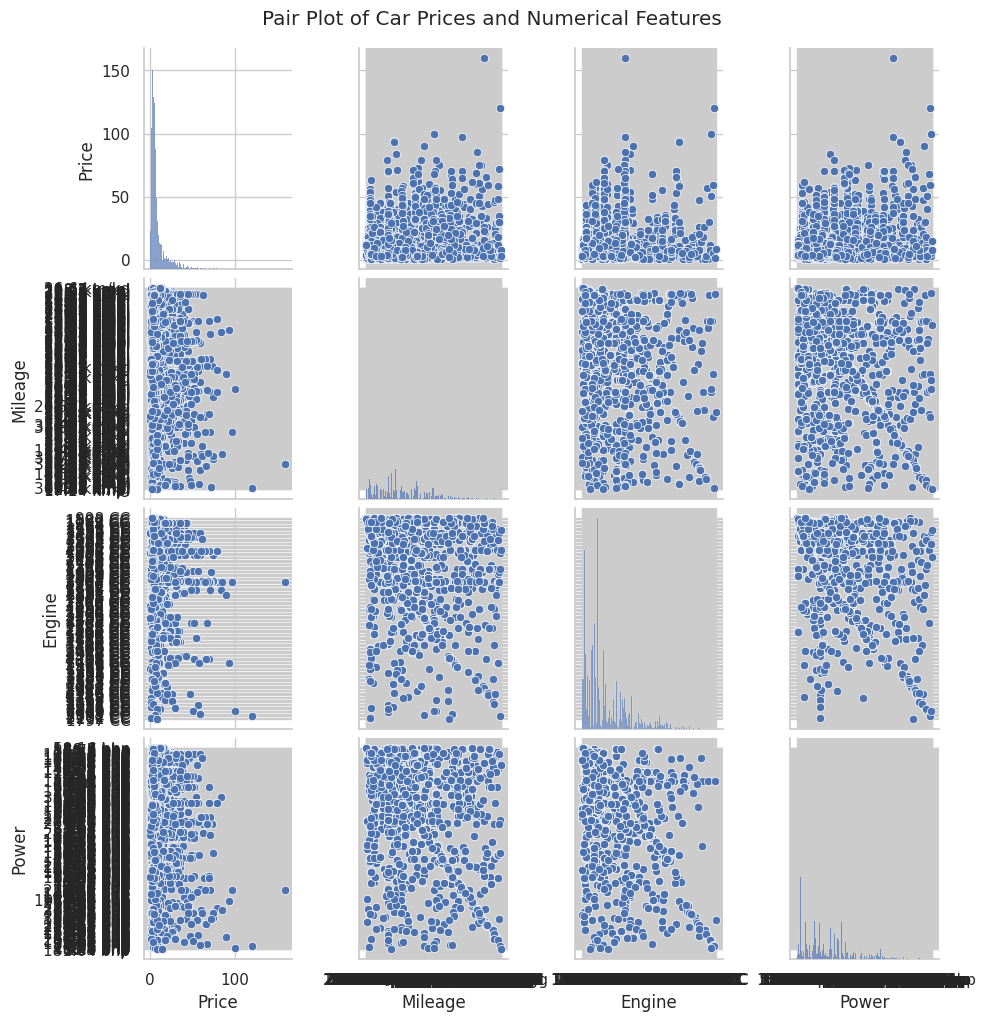

In [223]:
plt.figure(figsize=(12, 8))
sns.pairplot(traindata, vars=['Price', 'Mileage', 'Engine', 'Power'], kind='scatter')
plt.suptitle('Pair Plot of Car Prices and Numerical Features', y=1.02)
plt.show()

**None of the Independent variables show complete linearity with respect to the dependent variable. An equation of first order will not be able to capture the non-linearity completely which would result in a sub-par model. In order to square the variables and fit the model, we will use Linear Regression with Polynomial Features**

#Encoding categorical data

---




In [224]:
#Number of columns in the traindata as objects
traindata.select_dtypes(include = 'object').columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Brand', 'Model'],
      dtype='object')

In [225]:
#Number of unique values in the column
traindata.nunique()

Location               11
Year                   22
Kilometers_Driven    3074
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               442
Engine                145
Power                 371
Seats                   9
Price                1369
Brand                  31
Model                 209
dtype: int64

# **Preprocessing**

---



In [226]:
#Conversion of categorical column to numerical feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Step 1: Loop through all columns in the DataFrame
for column in traindata.columns:
    # Step 2: Check if the column type is 'object'
    if traindata[column].dtype == 'object':
        # Step 3: Apply LabelEncoder to transform the column
        traindata[column] = label_encoder.fit_transform(traindata[column].astype(str))



In [227]:
traindata.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,9,2010,72000,0,1,0,403,143,259,5.0,1.75,18,186
1,10,2015,41000,1,1,0,275,39,56,5.0,12.50,10,53
2,2,2011,46000,3,1,0,232,12,343,5.0,4.50,9,97
3,2,2012,87000,1,1,0,308,14,345,7.0,6.00,18,68
4,3,2013,40670,1,0,2,135,58,76,5.0,17.74,1,10


In [228]:
testdata.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20


In [229]:
testdata.select_dtypes(include = 'object').columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Brand', 'Model'],
      dtype='object')

In [230]:
#Number of unique columns in Testdata
testdata.nunique()

Location              11
Year                  20
Kilometers_Driven    750
Fuel_Type              4
Transmission           2
Owner_Type             4
Mileage              301
Engine               104
Power                249
Seats                  7
Brand                 29
Model                161
dtype: int64

In [231]:
#Conversion of categorical column in testdata to numerical feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Step 1: Loop through all columns in the DataFrame
for column in testdata.columns:
    # Step 2: Check if the column type is 'object'
    if testdata[column].dtype == 'object':
        # Step 3: Apply LabelEncoder to transform the column
        testdata[column] = label_encoder.fit_transform(testdata[column].astype(str))


In [232]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5968 non-null   int64  
 1   Year               5968 non-null   int64  
 2   Kilometers_Driven  5968 non-null   int64  
 3   Fuel_Type          5968 non-null   int64  
 4   Transmission       5968 non-null   int64  
 5   Owner_Type         5968 non-null   int64  
 6   Mileage            5968 non-null   int64  
 7   Engine             5968 non-null   int64  
 8   Power              5968 non-null   int64  
 9   Seats              5968 non-null   float64
 10  Price              5968 non-null   float64
 11  Brand              5968 non-null   int64  
 12  Model              5968 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 652.8 KB


In [233]:
#Target column
target = 'Price'

In [234]:
#Feature column
feature = ['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand','Model']


In [235]:
traindata[feature].head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,9,2010,72000,0,1,0,403,143,259,5.0,18,186
1,10,2015,41000,1,1,0,275,39,56,5.0,10,53
2,2,2011,46000,3,1,0,232,12,343,5.0,9,97
3,2,2012,87000,1,1,0,308,14,345,7.0,18,68
4,3,2013,40670,1,0,2,135,58,76,5.0,1,10


In [236]:
testdata[feature].head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,4,2014,40929,0,1,0,294,102,163,4.0,16,16
1,3,2013,54493,3,1,2,273,97,154,5.0,16,16
2,9,2017,34000,1,1,0,53,67,65,7.0,26,78
3,5,2012,139000,1,1,0,261,16,248,5.0,26,60
4,9,2014,29000,3,1,0,167,9,211,5.0,9,159


#Correlation Plot & Matrix

Location: -0.12
Year: 0.31
Kilometers_Driven: -0.18
Fuel_Type: -0.30
Transmission: -0.59
Owner_Type: -0.09
Mileage: -0.30
Engine: 0.31
Power: -0.25
Seats: 0.05
Brand: -0.13
Model: -0.09


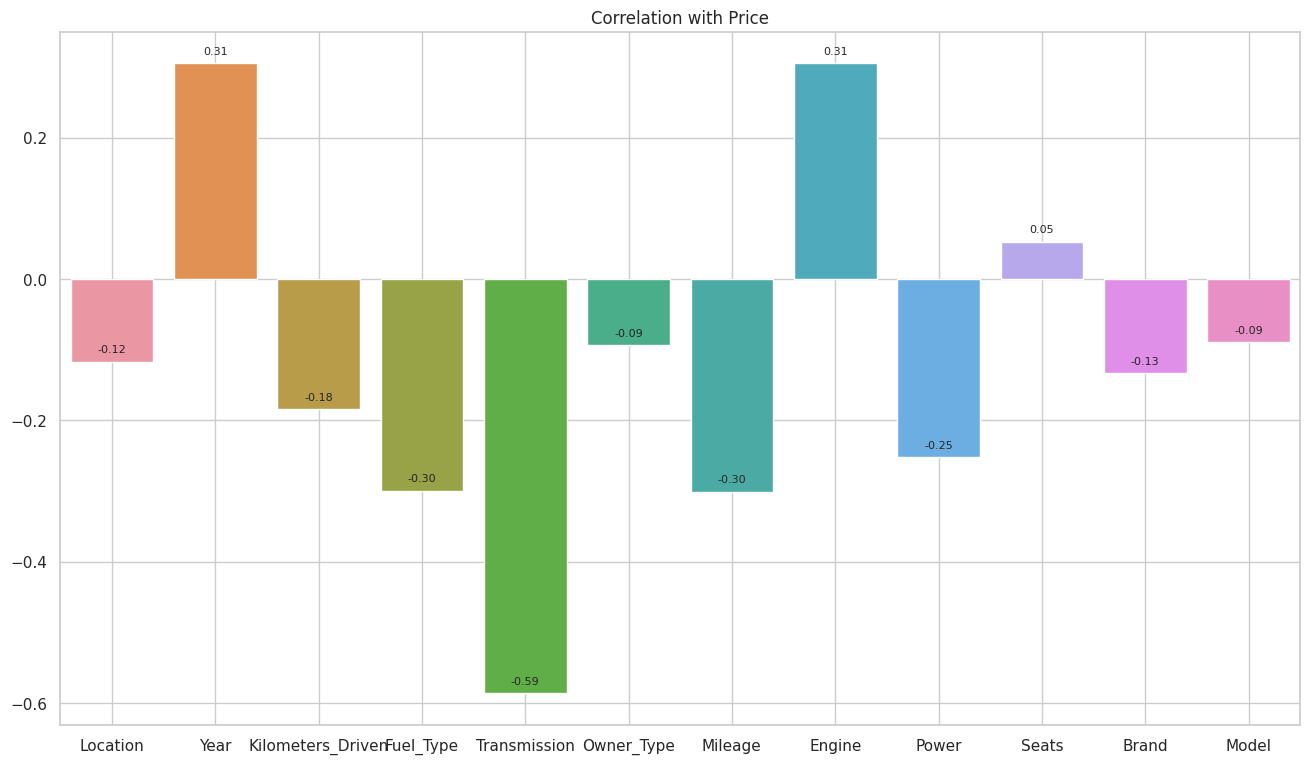

In [237]:
# Assuming traindata is your DataFrame
traindata_2 = traindata.drop(columns='Price')
correlation_series = traindata_2.corrwith(traindata['Price'])

# Print feature names and their correlation with 'Price'
for feature, correlation in zip(correlation_series.index, correlation_series.values):
    print(f"{feature}: {correlation:.2f}")

# Create a bar plot
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=correlation_series.index, y=correlation_series.values)

# Display numerical values on top of the bars
for i, v in enumerate(correlation_series.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Correlation with Price')
plt.grid(True)
plt.show()


**Since Year and Engine are higly correlated with each other one of them needs to be dropped**

**Fuel_type and Mileage are also highly correlated so one needs to be dropped**

**Columns with low correlation with price are dropped**

In [238]:
traindata.drop(['Mileage', 'Year', 'Owner_Type','Seats'], axis=1, inplace=True)
testdata.drop(['Mileage', 'Year', 'Owner_Type','Seats'], axis=1, inplace=True)

Location: -0.12
Kilometers_Driven: -0.18
Fuel_Type: -0.30
Transmission: -0.59
Engine: 0.31
Power: -0.25
Brand: -0.13
Model: -0.09


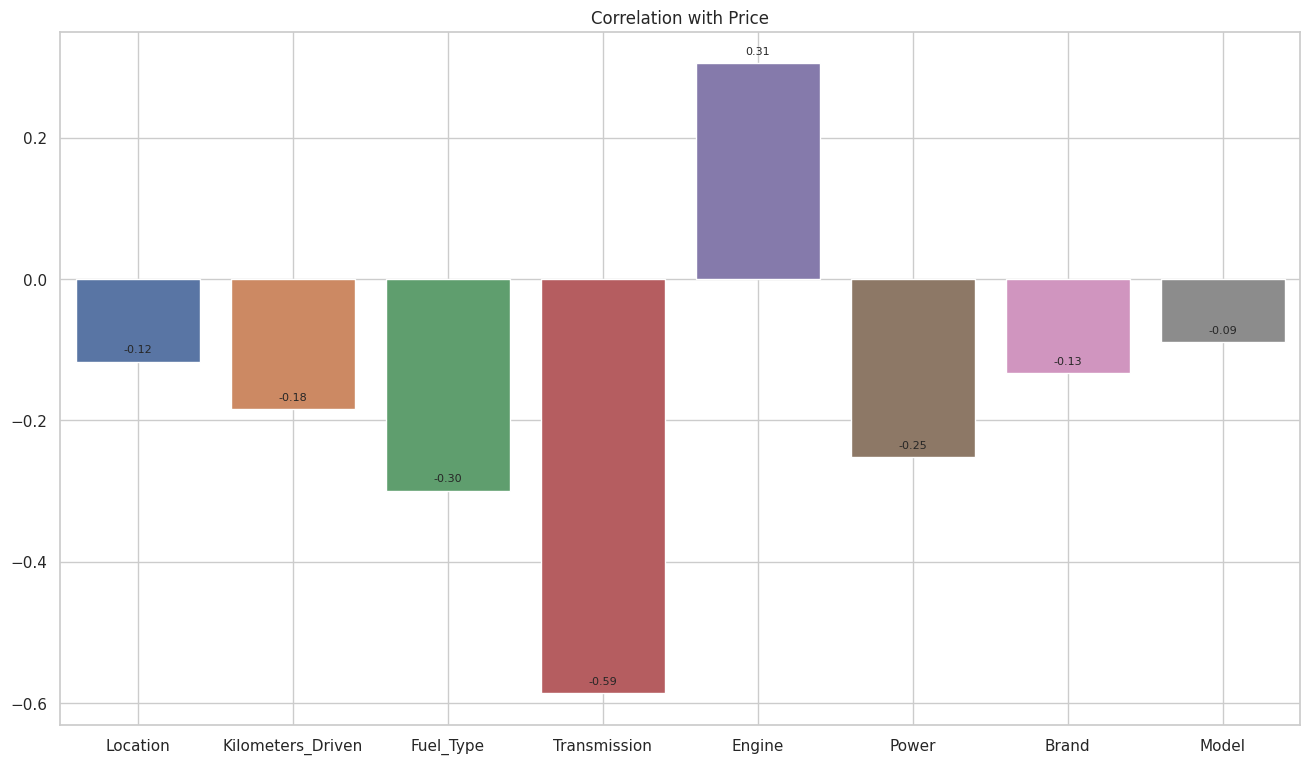

In [239]:
# Assuming traindata is your DataFrame
traindata_2 = traindata.drop(columns='Price')
correlation_series = traindata_2.corrwith(traindata['Price'])

# Print feature names and their correlation with 'Price'
for feature, correlation in zip(correlation_series.index, correlation_series.values):
    print(f"{feature}: {correlation:.2f}")

# Create a bar plot
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=correlation_series.index, y=correlation_series.values)

# Display numerical values on top of the bars
for i, v in enumerate(correlation_series.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Correlation with Price')
plt.grid(True)
plt.show()


Correlation Matrix:
                   Location  Kilometers_Driven  Fuel_Type  Transmission  \
Location           1.000000          -0.069727   0.114414      0.042046   
Kilometers_Driven -0.069727           1.000000  -0.250182      0.123314   
Fuel_Type          0.114414          -0.250182   1.000000      0.117247   
Transmission       0.042046           0.123314   0.117247      1.000000   
Engine            -0.036537           0.035540  -0.066992     -0.276288   
Power              0.021427          -0.116662   0.158046      0.324510   
Price             -0.116924          -0.184785  -0.299913     -0.586239   
Brand              0.026536           0.122937  -0.068996      0.169070   
Model              0.006370           0.041793  -0.035934      0.173386   

                     Engine     Power     Price     Brand     Model  
Location          -0.036537  0.021427 -0.116924  0.026536  0.006370  
Kilometers_Driven  0.035540 -0.116662 -0.184785  0.122937  0.041793  
Fuel_Type         -

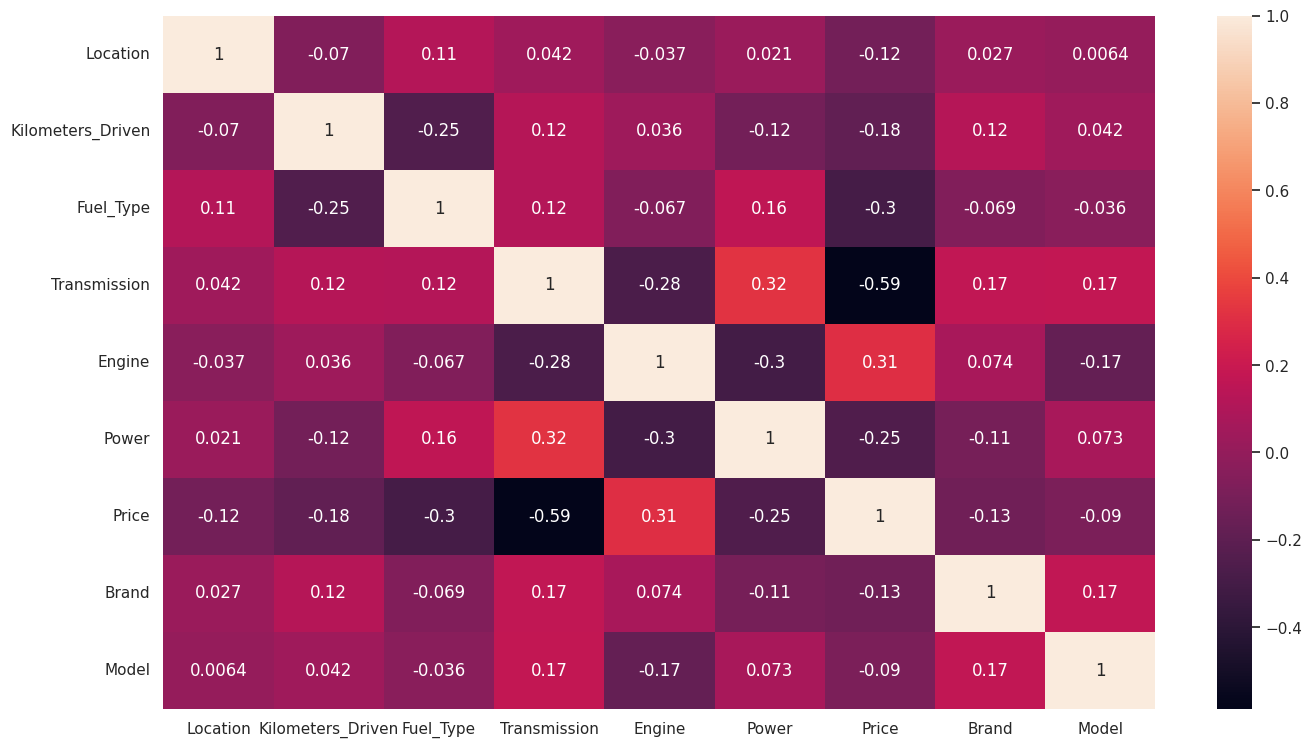

In [240]:
#Heatmap
correlation_matrix = traindata.corr()
plt.figure(figsize = (16,9))
sns.heatmap(correlation_matrix, annot = True)
print("Correlation Matrix:")
print(correlation_matrix)

#Data Splitting


In [241]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

x = traindata.drop("Price",axis=1)
y = traindata["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


#Feature Scaling

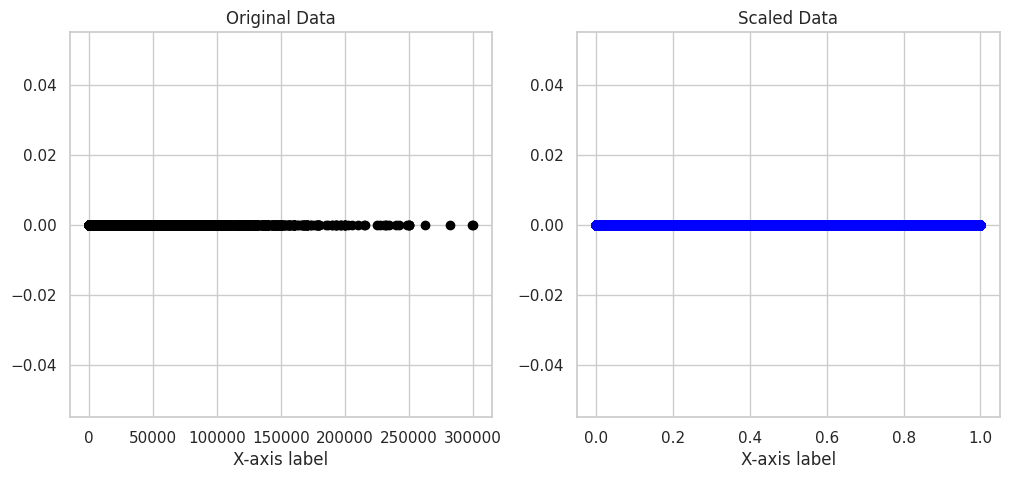

In [242]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Transforming the train and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Step 2: Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Original Data
axes[0].scatter(x_train, np.zeros_like(x_train), color='black', label='Original Data')
axes[0].set_xlabel('X-axis label')
axes[0].set_title('Original Data')

# Subplot 2: Scaled Data
axes[1].scatter(x_train_scaled, np.zeros_like(x_train_scaled), color='blue', label='Scaled Data')
axes[1].set_xlabel('X-axis label')
axes[1].set_title('Scaled Data')
plt.show()


#Models

##Multiple Linear Regression (MLR) Model Training

Model: LinearRegression, Test Size: 0.1
Mean Squared Error (MSE): 15.423629193551005
Mean Absolute Error (MAE): 2.6231878037626024
R-squared (R2): 0.8779289334188948
Root Mean Squared Error (RMSE): 3.927292858134087
Training score: 0.8779289334188949


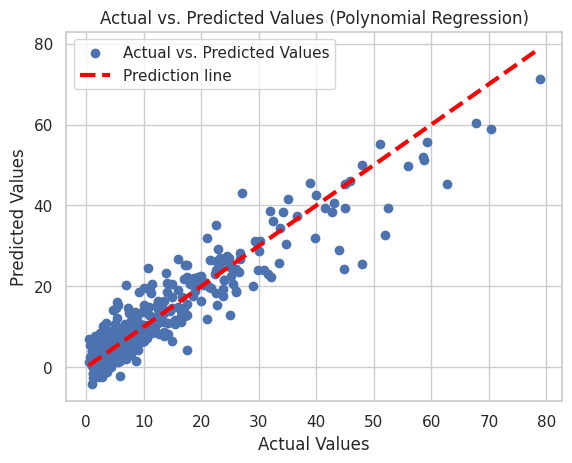

Model: LinearRegression, Test Size: 0.2
Mean Squared Error (MSE): 20.83449103771192
Mean Absolute Error (MAE): 2.9050924659560797
R-squared (R2): 0.8292151765051021
Root Mean Squared Error (RMSE): 4.564481464275205
Training score: 0.8292151765051021


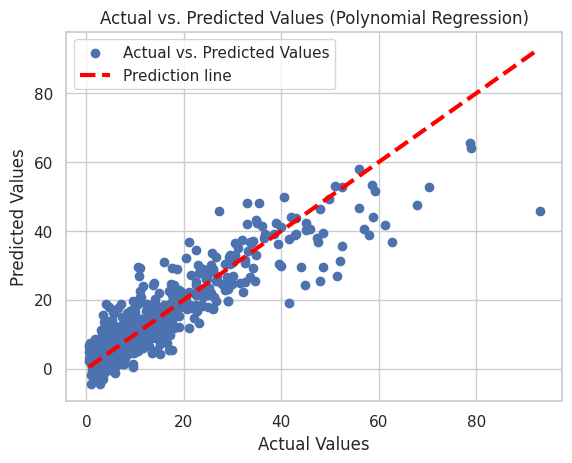

Model: LinearRegression, Test Size: 0.3
Mean Squared Error (MSE): 26.88141228440347
Mean Absolute Error (MAE): 3.130879866820269
R-squared (R2): 0.7896582227267952
Root Mean Squared Error (RMSE): 5.184728757071431
Training score: 0.7896582227267952


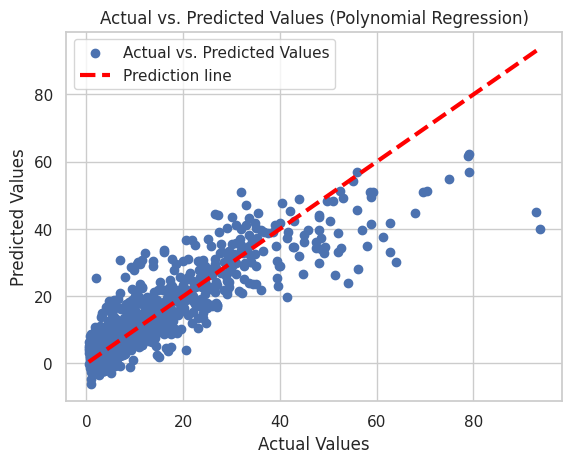

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


model_lr = LinearRegression()
test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    # Fit polynomial features
    poly = PolynomialFeatures(degree=3,
    )
    X_poly_train = poly.fit_transform(x_train_scaled)
    X_poly_test = poly.fit_transform(x_test_scaled)

    # Fit the polynomial features
    model_Reg = sm.OLS(y_test, X_poly_test).fit()

    # Make predictions on the test set
    ypred_poly_Reg = model_Reg.predict(X_poly_test)

    # Evaluate the model
    mse_poly_Reg = mean_squared_error(y_test, ypred_poly_Reg)
    rmse_poly_Reg = np.sqrt(mse_poly_Reg)
    mae_poly_Reg= mean_absolute_error(y_test, ypred_poly_Reg)
    r2_poly_Reg = r2_score(y_test, ypred_poly_Reg)

    # Score on training data (using x_train_scaled, not X_poly)
    training_poly = model_Reg.rsquared

    # Display metrics
    print(f"Model: LinearRegression, Test Size: {test_size}")
    print(f'Mean Squared Error (MSE): {mse_poly_Reg}')
    print(f'Mean Absolute Error (MAE): {mae_poly_Reg}')
    print(f'R-squared (R2): {r2_poly_Reg}')
    print(f'Root Mean Squared Error (RMSE): {rmse_poly_Reg}')
    print(f"Training score: {training_poly}")

    # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, ypred_poly_Reg, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Polynomial Regression)")

    # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
                label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

##RandomForestRegressor Model

Important features for the model
[0.03600976 0.1364136  0.03231771 0.34172638 0.19773913 0.17799307
 0.0284352  0.04936515] 



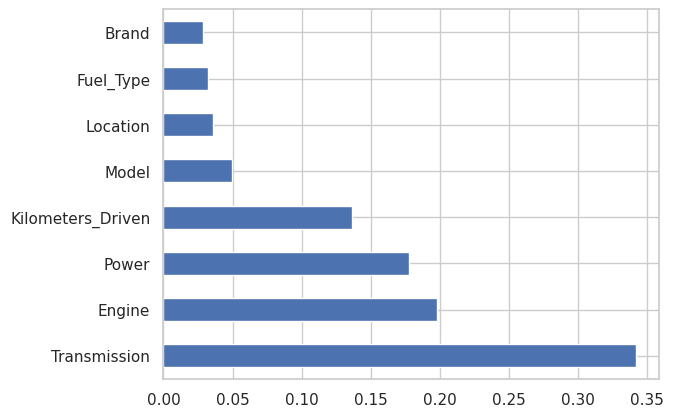

Evaluate the model
Model: RandomForestRegressor, Test Size: 0.1
Mean Squared Error (MSE): 15.290013699833562
Root Mean Squared Error (RMSE): 3.9102447109910603
Mean Absolute Error (MAE): 2.001422416846136
R-squared (R2): 0.8789864397700374
Training score: 0.9766524707211509


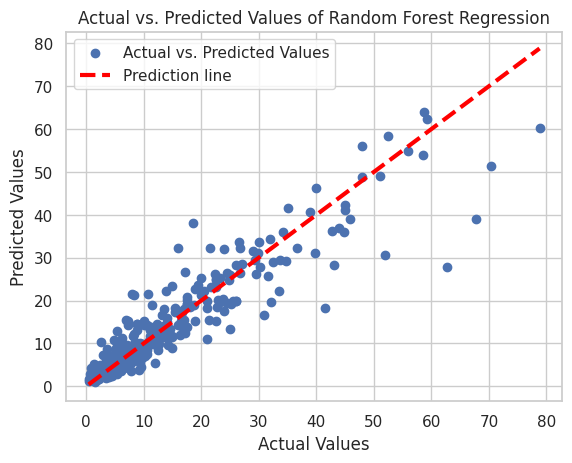

Important features for the model
[0.03597202 0.13448026 0.03136421 0.33924955 0.20193274 0.17891867
 0.02914845 0.0489341 ] 



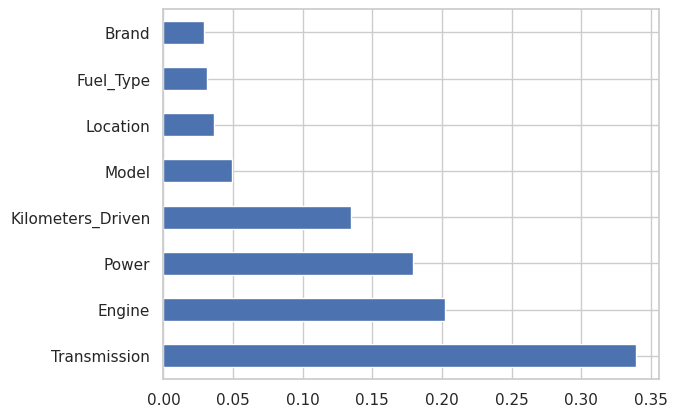

Evaluate the model
Model: RandomForestRegressor, Test Size: 0.2
Mean Squared Error (MSE): 15.841258235562886
Root Mean Squared Error (RMSE): 3.980107817077684
Mean Absolute Error (MAE): 2.0403790971391347
R-squared (R2): 0.8701457843726226
Training score: 0.9763277944627101


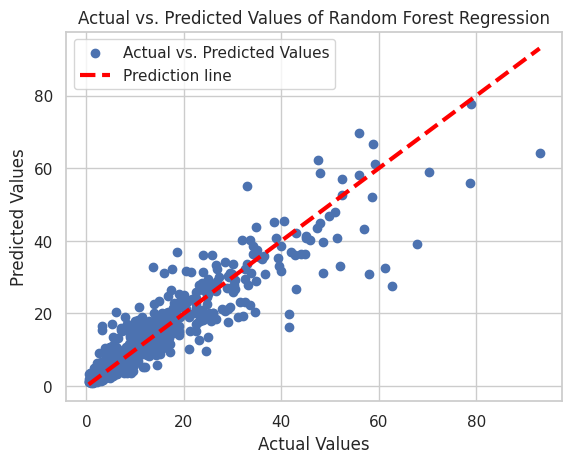

Important features for the model
[0.04158647 0.14099143 0.02612661 0.33622256 0.19862032 0.17918582
 0.03278117 0.04448561] 



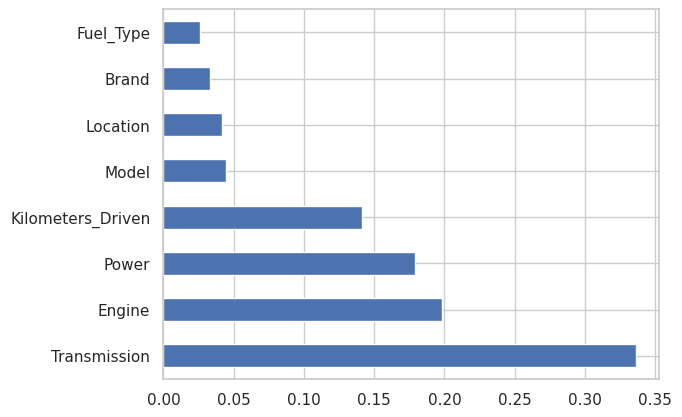

Evaluate the model
Model: RandomForestRegressor, Test Size: 0.3
Mean Squared Error (MSE): 20.443076087013573
Root Mean Squared Error (RMSE): 4.521402004579285
Mean Absolute Error (MAE): 2.1350301013666213
R-squared (R2): 0.8400369403370724
Training score: 0.9770009106788574


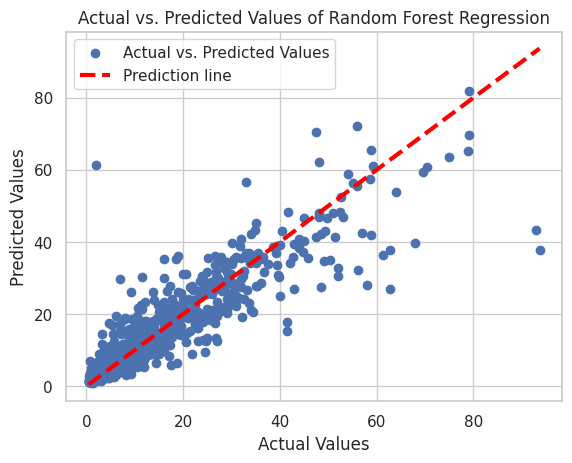

In [244]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor()

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    model_random.fit(x_train_scaled, y_train)
    y_predict = model_random.predict(x_test_scaled)

    #important features
    print('Important features for the model')
    print(model_random.feature_importances_, '\n')

    #plot graph of feature importance for better visualization
    feat_importances = pd.Series(model_random.feature_importances_, index=x.columns)
    feat_importances.nlargest(11).plot(kind='barh')
    plt.show()

    # Evaluate the model
    print('Evaluate the model')
    mse_random = mean_squared_error(y_test, y_predict)
    rmse_random = np.sqrt(mse_random)
    mae_random = mean_absolute_error(y_test, y_predict)
    r2_random = r2_score(y_test, y_predict)

    print(f"Model: RandomForestRegressor, Test Size: {test_size}")
    print(f'Mean Squared Error (MSE): {mse_random}')
    print(f'Root Mean Squared Error (RMSE): {rmse_random}')
    print(f'Mean Absolute Error (MAE): {mae_random}')
    print(f'R-squared (R2): {r2_random}')

    # Score on training data
    training_random = model_random.score(x_train_scaled,y_train)
    print(f"Training score: {training_random}")

     # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_predict, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values of Random Forest Regression")


        # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
                label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

**Finding the optimal parameters using RandomizedSearchCV**

In [245]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 150, 200],
    'bootstrap'    : [True, False],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ["auto", "log2", "sqrt"],

}

In [246]:
parameters

{'n_estimators': [10, 50, 100, 150, 200],
 'bootstrap': [True, False],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'log2', 'sqrt']}

In [247]:
random_cv = RandomizedSearchCV(estimator=model_random,param_distributions=parameters,n_iter=10, scoring='neg_mean_absolute_error',random_state = 42, cv=5, verbose=2,n_jobs=-1)

In [248]:
random_cv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [249]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=200)

In [250]:
random_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

##Tune Random Forest

Model: RandomForestRegressor_tune, Test Size: 0.1
Mean Squared Error (MSE): 14.303890330986226
Root Mean Squared Error (RMSE): 3.782048430544779
Mean Absolute Error (MAE): 1.9320903126744833
R-squared (R²): 0.8867911613375191
Training score: 0.9829100436475818
Test score: 0.8867911613375191 



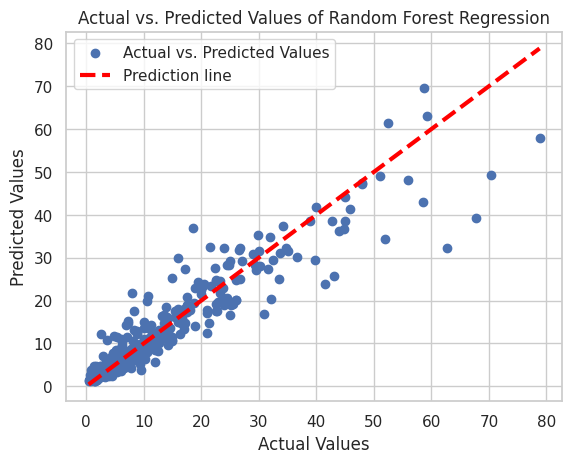

Model: RandomForestRegressor_tune, Test Size: 0.2
Mean Squared Error (MSE): 13.873332260847347
Root Mean Squared Error (RMSE): 3.7246922370643385
Mean Absolute Error (MAE): 1.912024486519901
R-squared (R²): 0.8862772986790901
Training score: 0.9823483584232158
Test score: 0.8862772986790901 



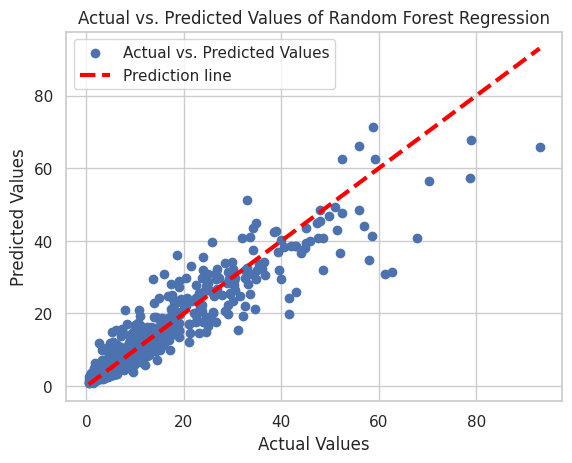

Model: RandomForestRegressor_tune, Test Size: 0.3
Mean Squared Error (MSE): 19.628576581976457
Root Mean Squared Error (RMSE): 4.43041494467239
Mean Absolute Error (MAE): 2.031190019542155
R-squared (R²): 0.8464102391676942
Training score: 0.982475649676488
Test score: 0.8464102391676942 



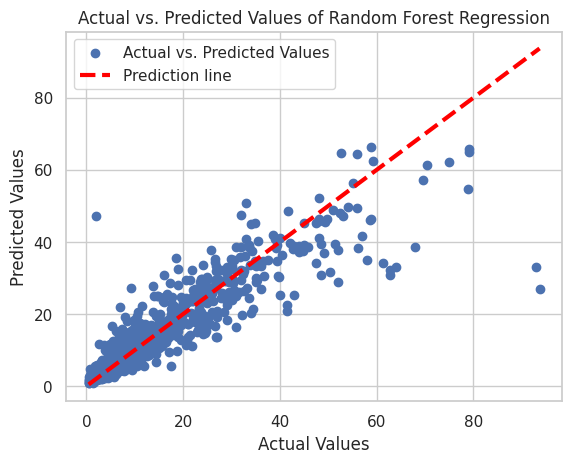

In [251]:
for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    fmodel_random = RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=200)

    fmodel_random.fit(x_train_scaled, y_train)
    y_predict = fmodel_random.predict(x_test_scaled)

    print(f"Model: RandomForestRegressor_tune, Test Size: {test_size}")

    mse_tune = mean_squared_error(y_test, y_predict)
    print(f"Mean Squared Error (MSE): {mse_tune}")

    rmse_tune = np.sqrt(mse_tune)
    print(f'Root Mean Squared Error (RMSE): {rmse_tune}')


    # Mean Absolute Error (MAE)
    mae_tune = mean_absolute_error(y_test, y_predict)
    print(f"Mean Absolute Error (MAE): {mae_tune}")

    # R-squared (R²)
    r2_tune = r2_score(y_test, y_predict)
    print(f"R-squared (R²): {r2_tune}")

    # Score on training data
    training_tune = fmodel_random.score(x_train_scaled,y_train)
    print(f"Training score: {training_tune}")

    # Score on Test data
    test_tune = fmodel_random.score(x_test_scaled,y_test)
    print(f"Test score: {test_tune} \n")

     # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_predict, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values of Random Forest Regression")


        # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
                label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

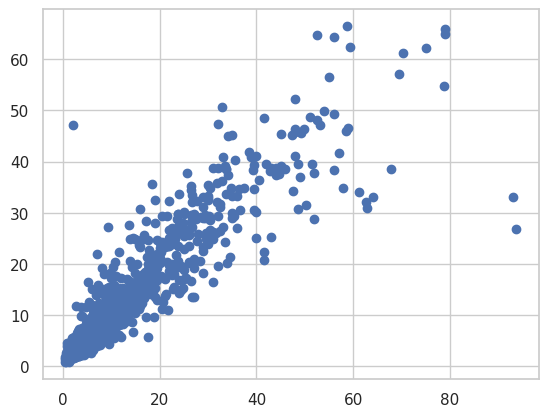

In [252]:
plt.scatter(y_test,y_predict)

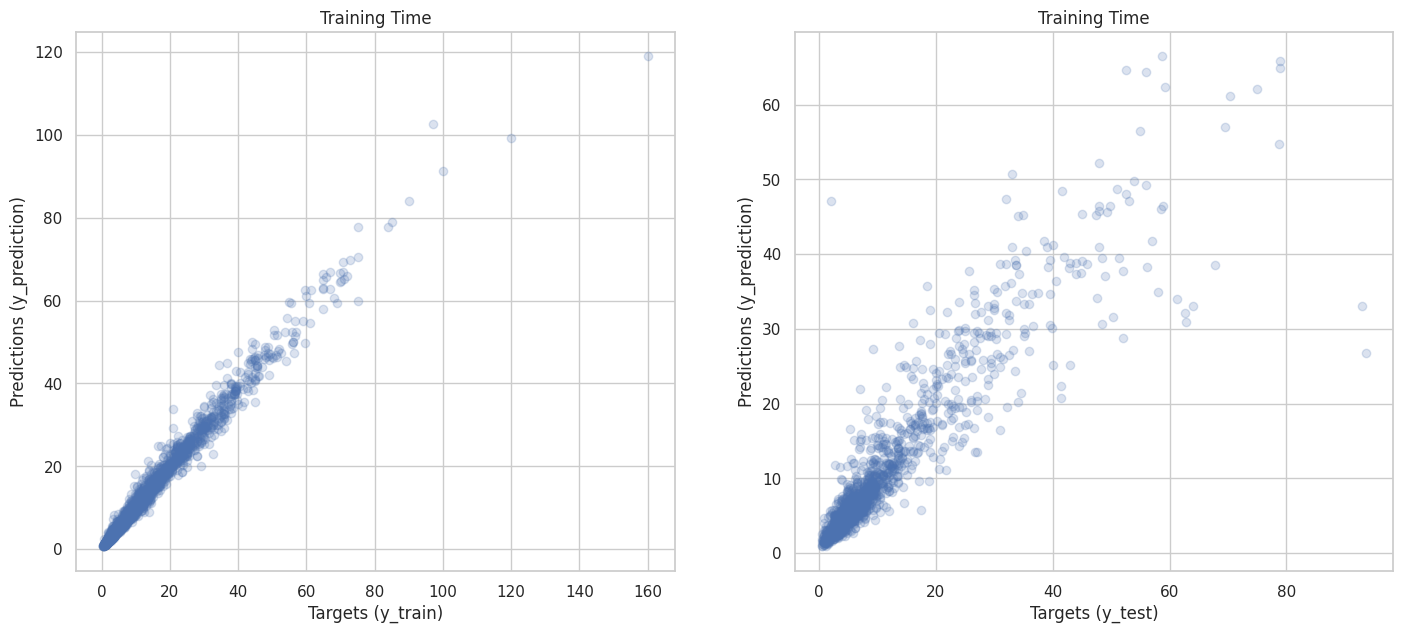

In [253]:
# Plotting the training set
#Check the prediction with the original values
plt.figure(figsize = (17,7))
y_predict_train = fmodel_random.predict(x_train_scaled)
plt.subplot(1,2,1)
plt.scatter(y_train, y_predict_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_prediction)');
plt.title('Training Time');

#Plotting testing error
y_predict = fmodel_random.predict(x_test_scaled)
plt.subplot(1,2,2)
plt.scatter(y_test, y_predict, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_prediction)');
plt.title('Training Time');

Checking the residual

<ipython-input-254-ff990452bbe2>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-254-ff990452bbe2>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Testing Residual')

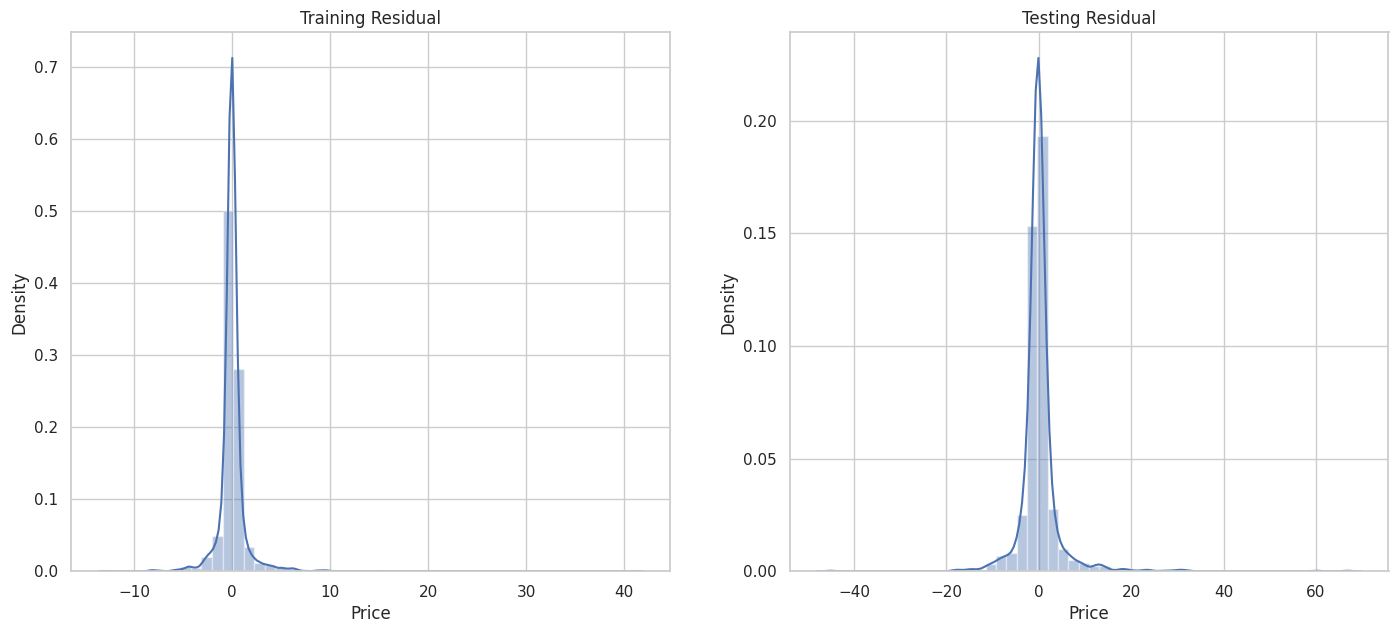

In [254]:
#Plotting the distribution of the residual
residual_train = (y_train - fmodel_random.predict(x_train_scaled))
residual_test = (y_test - fmodel_random.predict(x_test_scaled))

#plotting the distribution of the residual on the training set
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Training Residual')

#plotting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testing Residual')

Most of the data lie on 0 which shows that it makes right decisions most of the time

##Support Vector Regressor (SVR)

Mean Squared Error (MSE): 24.046103162897275
Root Mean Squared Error (RMSE): 4.903682612373814
Mean Absolute Error (MAE): 2.4093640934325173
R-squared (R2): 0.8028888981745664


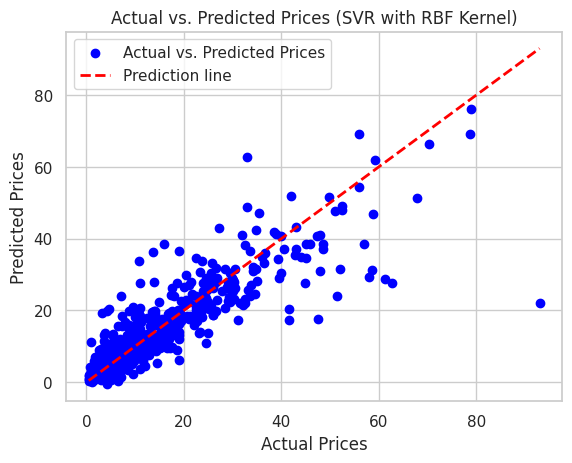

Mean Squared Error (MSE): 26.638994862815267
Root Mean Squared Error (RMSE): 5.161297788620152
Mean Absolute Error (MAE): 2.507392732579266
R-squared (R2): 0.7915550914909575


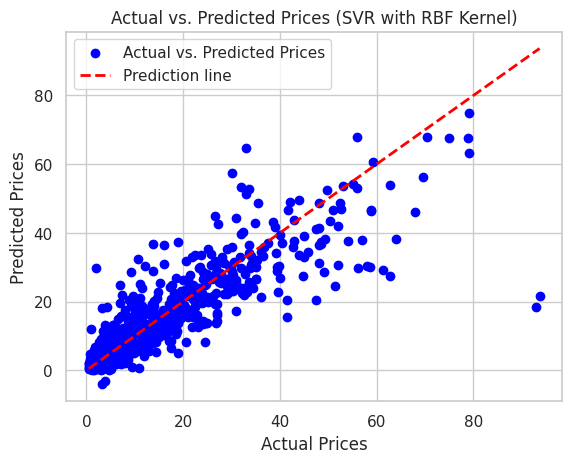

Mean Squared Error (MSE): 32.51840077388992
Root Mean Squared Error (RMSE): 5.702490751758386
Mean Absolute Error (MAE): 2.650756830236919
R-squared (R2): 0.7484254815206354


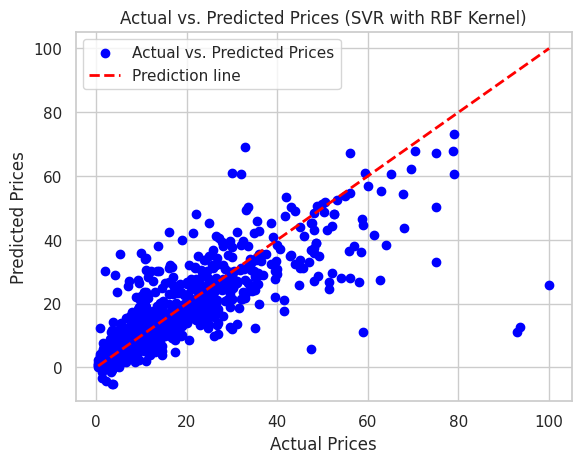

In [255]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are your features and target variable

test_sizes = [0.2, 0.3, 0.4]  # Adjust this list based on your requirements

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Train the SVR model on the scaled data
    svr = SVR(kernel='rbf', C=1e3, gamma='scale', degree=3)
    svr.fit(x_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(x_test_scaled)

    # Evaluate the performance of the model
    mse_svr = mean_squared_error(y_test, y_pred)
    rmse_svr = np.sqrt(mse_svr)
    mae_svr = mean_absolute_error(y_test, y_pred)
    r2_svr = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse_svr}')
    print(f'Root Mean Squared Error (RMSE): {rmse_svr}')
    print(f'Mean Absolute Error (MAE): {mae_svr}')
    print(f'R-squared (R2): {r2_svr}')

    # Scatter plot of actual vs predicted prices
    plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted Prices')

    # Plot the line representing perfect prediction (y = x)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Prediction line')

    # Set labels and title
    plt.title('Actual vs. Predicted Prices (SVR with RBF Kernel)')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


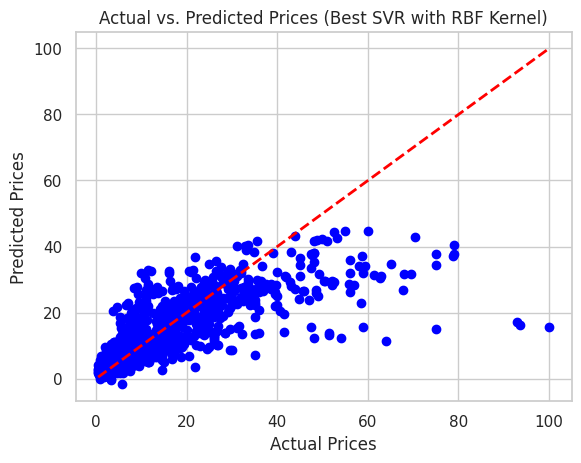

Best Parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Testing Metrics:
MSE: 44.85246416073037, MAE: 3.2150368400248897, R2: 0.6530045511060685


In [256]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
          'C': [1, 10, 100, 1000],
          'gamma': [0.1,0.01,0.001, 0.0001],
          'kernel': ['rbf']}

# Create the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Create GridSearchCV
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data and get the best model
best_svr_model = grid_search.fit(x_train_scaled, y_train).best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_svr_model.predict(x_test_scaled)

# Visualize the predictions with RBF kernel
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices (Best SVR with RBF Kernel)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the evaluation metrics
print("\nTesting Metrics:")
print(f"MSE: {mse_test}, MAE: {mae_test}, R2: {r2_test}")



##Ridge Regression

Best Model: Ridge Regression, Test Size: 0.1
Best Parameters: {'alpha': 0.01}
Mean Squared Error (MSE): 25.70847565817574
Mean Absolute Error (MAE): 2.872341400059011
R-squared (R2): 0.7965290137369176
Root Mean Squared Error (RMSE): 5.070352616749227
Training score: 0.8025573702783471


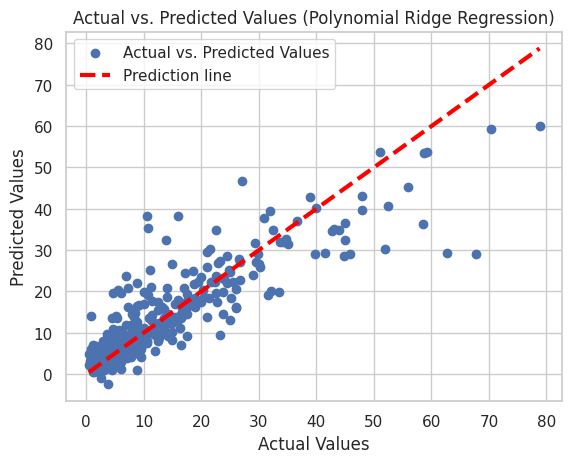

Best Model: Ridge Regression, Test Size: 0.2
Best Parameters: {'alpha': 0.01}
Mean Squared Error (MSE): 26.254703262984318
Mean Absolute Error (MAE): 2.893733649885671
R-squared (R2): 0.7847845260744067
Root Mean Squared Error (RMSE): 5.123934353890994
Training score: 0.8021294970379077


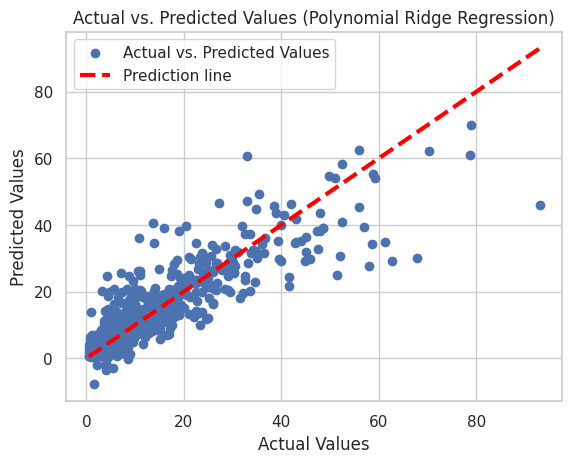

Best Model: Ridge Regression, Test Size: 0.3
Best Parameters: {'alpha': 0.01}
Mean Squared Error (MSE): 29.399394206229253
Mean Absolute Error (MAE): 2.996649463751454
R-squared (R2): 0.7699555081902555
Root Mean Squared Error (RMSE): 5.422120821802964
Training score: 0.8022582751590719


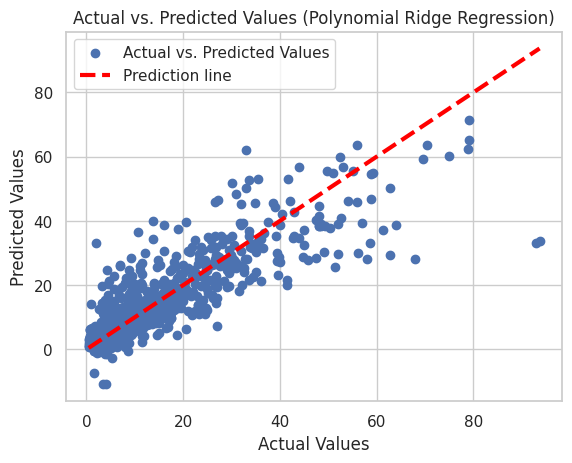

In [257]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.1,0.2,0.3]  # Define the test sizes

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Fit polynomial features on training data
    poly = PolynomialFeatures(degree=4)
    X_poly_train = poly.fit_transform(x_train_scaled)
    X_poly_test = poly.transform(x_test_scaled)

    # Define the parameter grid for the grid search
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    }

    # Create Ridge Regression model
    ridge_model = Ridge()

    # Create GridSearchCV object
    grid_search = GridSearchCV(ridge_model, param_grid, scoring='r2', cv=5, n_jobs=-1)

    # Perform grid search on training data
    grid_search.fit(X_poly_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Fit the Ridge Regression model with the best parameters
    best_ridge_model = Ridge(**best_params)
    best_ridge_model.fit(X_poly_train, y_train)

    # Make predictions on the test set
    y_pred_poly = best_ridge_model.predict(X_poly_test)
    # Evaluate the model
    mse_ridge = mean_squared_error(y_test, y_pred_poly)
    rmse_ridge = np.sqrt(mse_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_poly)
    r2_ridge = r2_score(y_test, y_pred_poly)

    # Score on training data (using x_train_scaled, not X_poly)
    training_poly = best_ridge_model.score(X_poly_train, y_train)

    # Display metrics
    print(f"Best Model: Ridge Regression, Test Size: {test_size}")
    print(f'Best Parameters: {best_params}')
    print(f'Mean Squared Error (MSE): {mse_ridge}')
    print(f'Mean Absolute Error (MAE): {mae_ridge}')
    print(f'R-squared (R2): {r2_ridge}')
    print(f'Root Mean Squared Error (RMSE): {rmse_ridge}')
    print(f"Training score: {training_poly}")

    # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_pred_poly, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Polynomial Ridge Regression)")

    # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
            label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


##Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.014e+04, tolerance: 6.715e+01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.014e+04, tolerance: 6.715e+01



Best Model: Lasso Regression, Test Size: 0.1
Best Parameters: {'alpha': 0.001}
Mean Squared Error (MSE): 28.697855301361788
Mean Absolute Error (MAE): 3.137887146930767
R-squared (R2): 0.77286942254212
Root Mean Squared Error (RMSE): 5.357037922337473
Training score: 0.7485081996114308


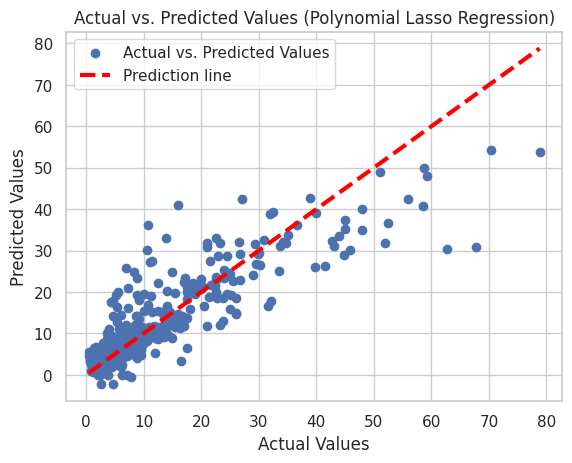

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.308e+04, tolerance: 6.013e+01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.308e+04, tolerance: 6.013e+01



Best Model: Lasso Regression, Test Size: 0.2
Best Parameters: {'alpha': 0.001}
Mean Squared Error (MSE): 29.309846488632974
Mean Absolute Error (MAE): 3.086078887571394
R-squared (R2): 0.7597408571122231
Root Mean Squared Error (RMSE): 5.413856895839876
Training score: 0.7468409424366393


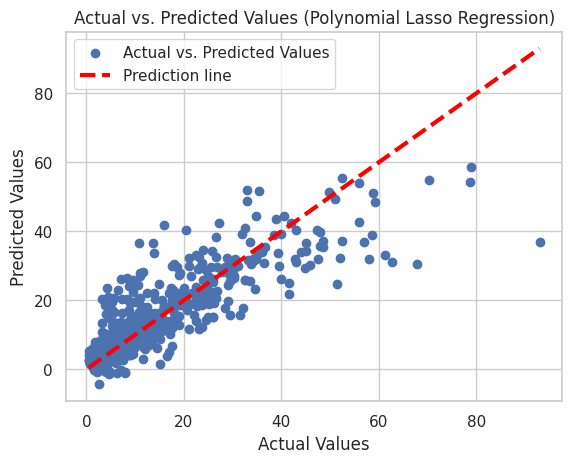

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.665e+04, tolerance: 5.180e+01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.665e+04, tolerance: 5.180e+01



Best Model: Lasso Regression, Test Size: 0.3
Best Parameters: {'alpha': 0.001}
Mean Squared Error (MSE): 31.760640220455954
Mean Absolute Error (MAE): 3.1444813233800986
R-squared (R2): 0.7514792213807309
Root Mean Squared Error (RMSE): 5.635657922590401
Training score: 0.7473173314302157


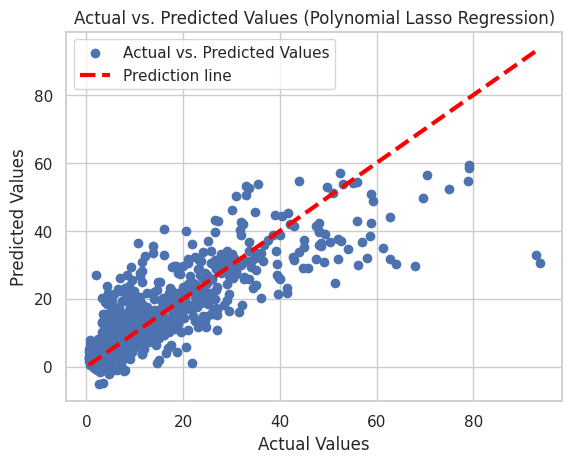

In [258]:
from sklearn.linear_model import Lasso

test_sizes = [0.1, 0.2, 0.3]  # Define the test sizes

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Fit polynomial features on training data
    poly = PolynomialFeatures(degree=4)
    X_poly_train = poly.fit_transform(x_train_scaled)
    X_poly_test = poly.transform(x_test_scaled)

    # Define the parameter grid for the grid search
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    }

    # Create Lasso Regression model
    lasso_model = Lasso()  # Create Lasso model instead of Ridge

    # Create GridSearchCV object
    grid_search = GridSearchCV(lasso_model, param_grid, scoring='r2', cv=5, n_jobs=-1)

    # Perform grid search on training data
    grid_search.fit(X_poly_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Fit the Lasso Regression model with the best parameters
    best_lasso_model = Lasso(**best_params)  # Use Lasso instead of Ridge
    best_lasso_model.fit(X_poly_train, y_train)

    # Make predictions on the test set
    y_pred_poly = best_lasso_model.predict(X_poly_test)

    # Evaluate the model
    mse_lasso = mean_squared_error(y_test, y_pred_poly)
    rmse_lasso = np.sqrt(mse_lasso)
    mae_lasso = mean_absolute_error(y_test, y_pred_poly)
    r2_lasso = r2_score(y_test, y_pred_poly)

    # Score on training data (using x_train_scaled, not X_poly)
    training_poly = best_lasso_model.score(X_poly_train, y_train)

    # Display metrics
    print(f"Best Model: Lasso Regression, Test Size: {test_size}")  # Mention Lasso Regression
    print(f'Best Parameters: {best_params}')
    print(f'Mean Squared Error (MSE): {mse_lasso}')
    print(f'Mean Absolute Error (MAE): {mae_lasso}')
    print(f'R-squared (R2): {r2_lasso}')
    print(f'Root Mean Squared Error (RMSE): {rmse_lasso}')
    print(f"Training score: {training_poly}")

    # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_pred_poly, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Polynomial Lasso Regression)")

    # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
             label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


##Elastic Net

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+04, tolerance: 6.715e+01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+04, tolerance: 6.715e+01



Best Model: Elastic Net Regression, Test Size: 0.1
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Mean Squared Error (MSE): 30.057394825934235
Mean Absolute Error (MAE): 3.202809431906945
R-squared (R2): 0.76210928057157
Root Mean Squared Error (RMSE): 5.482462478296977
Training score: 0.7316833943045681


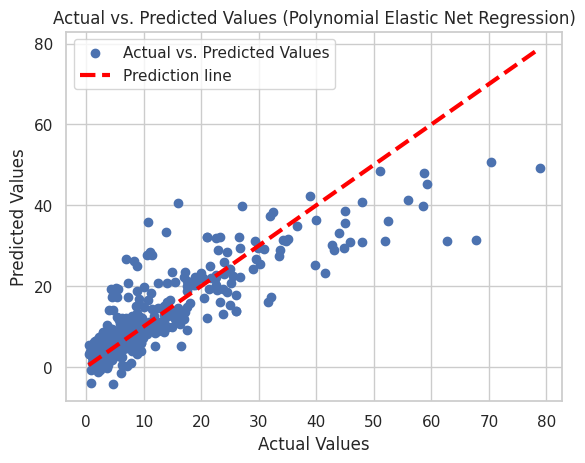

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.998e+04, tolerance: 6.013e+01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.998e+04, tolerance: 6.013e+01



Best Model: Elastic Net Regression, Test Size: 0.2
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Mean Squared Error (MSE): 31.036189143137083
Mean Absolute Error (MAE): 3.1753371997742077
R-squared (R2): 0.7455896534659459
Root Mean Squared Error (RMSE): 5.571013295903815
Training score: 0.7305215739657709


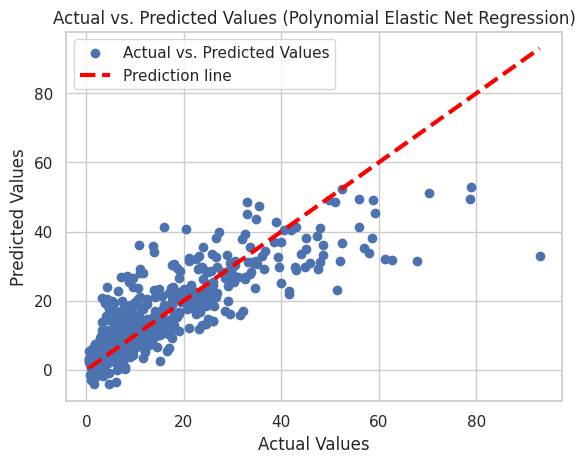

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+04, tolerance: 5.180e+01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+04, tolerance: 5.180e+01



Best Model: Elastic Net Regression, Test Size: 0.3
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Mean Squared Error (MSE): 33.24993394208305
Mean Absolute Error (MAE): 3.2107680109471417
R-squared (R2): 0.739825790192868
Root Mean Squared Error (RMSE): 5.766275569384717
Training score: 0.7295953391872326


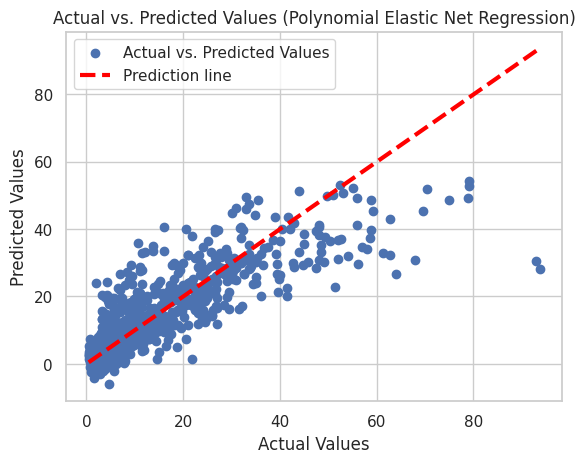

In [259]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

test_sizes = [0.1, 0.2, 0.3]  # Define the test sizes

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Fit polynomial features on training data
    poly = PolynomialFeatures(degree=4)
    X_poly_train = poly.fit_transform(x_train_scaled)
    X_poly_test = poly.transform(x_test_scaled)

    # Define the parameter grid for the grid search
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # l1_ratio controls the balance between L1 and L2 regularization
    }

    # Create Elastic Net model
    elastic_net_model = ElasticNet()  # Create Elastic Net model

    # Create GridSearchCV object
    grid_search = GridSearchCV(elastic_net_model, param_grid, scoring='r2', cv=5, n_jobs=-1)

    # Perform grid search on training data
    grid_search.fit(X_poly_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Fit the Elastic Net model with the best parameters
    best_elastic_net_model = ElasticNet(**best_params)  # Use Elastic Net instead of Lasso
    best_elastic_net_model.fit(X_poly_train, y_train)

    # Make predictions on the test set
    y_pred_poly = best_elastic_net_model.predict(X_poly_test)

    # Evaluate the model
    mse_elastic_net = mean_squared_error(y_test, y_pred_poly)
    rmse_elastic_net = np.sqrt(mse_elastic_net)
    mae_elastic_net = mean_absolute_error(y_test, y_pred_poly)
    r2_elastic_net = r2_score(y_test, y_pred_poly)

    # Score on training data (using x_train_scaled, not X_poly)
    training_poly = best_elastic_net_model.score(X_poly_train, y_train)

    # Display metrics
    print(f"Best Model: Elastic Net Regression, Test Size: {test_size}")
    print(f'Best Parameters: {best_params}')
    print(f'Mean Squared Error (MSE): {mse_elastic_net}')
    print(f'Mean Absolute Error (MAE): {mae_elastic_net}')
    print(f'R-squared (R2): {r2_elastic_net}')
    print(f'Root Mean Squared Error (RMSE): {rmse_elastic_net}')
    print(f"Training score: {training_poly}")

    # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_pred_poly, label='Actual vs. Predicted Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Polynomial Elastic Net Regression)")

    # Plot the line of best fit
    sort_axis = np.argsort(y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3,
             label='Prediction line')
    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


##Decision Tree Regressor (DTR)

Best Model: Decision Tree Regression, Test Size: 0.1
Mean Squared Error (MSE): 35.85129919845557
Mean Absolute Error (MAE): 3.3558573072609965
R-squared (R2): 0.7162531414264242
Root Mean Squared Error (RMSE): 5.987595443786727
Training score: 0.7725502323321118


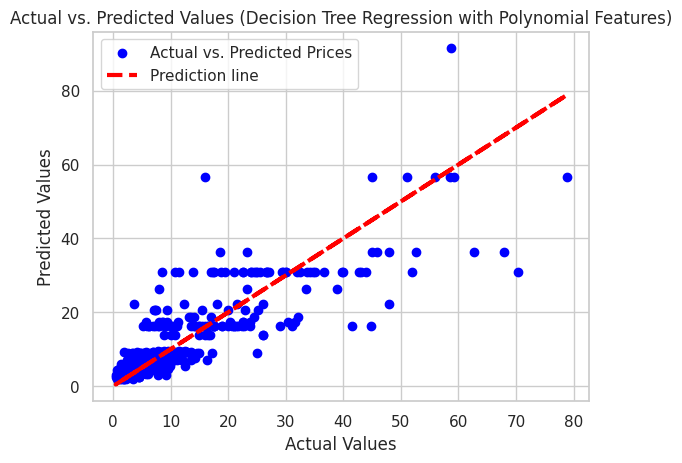

Best Model: Decision Tree Regression, Test Size: 0.2
Mean Squared Error (MSE): 30.809638201181503
Mean Absolute Error (MAE): 3.1360909369731176
R-squared (R2): 0.7474467404744287
Root Mean Squared Error (RMSE): 5.550643043934775
Training score: 0.7694061801959411


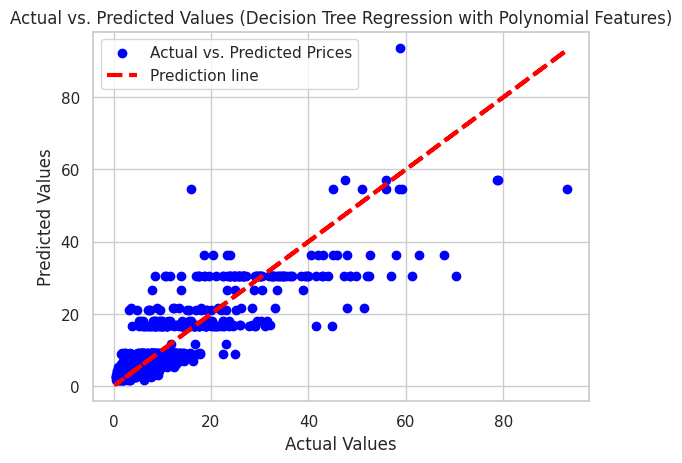

Best Model: Decision Tree Regression, Test Size: 0.3
Mean Squared Error (MSE): 35.31580199402261
Mean Absolute Error (MAE): 3.21015927112713
R-squared (R2): 0.7236607779881701
Root Mean Squared Error (RMSE): 5.942709987372983
Training score: 0.7747633873355788


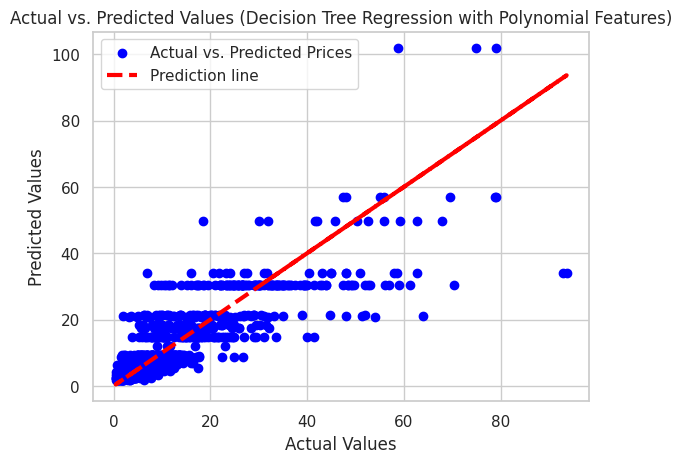

In [260]:
from sklearn.tree import DecisionTreeRegressor

for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Create the polynomial features.
    poly = PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(x_train_scaled)
    X_poly_test = poly.transform(x_test_scaled)

    # Create the decision tree regression model.
    modeldtr = DecisionTreeRegressor(max_depth=5)

    # Train the model on polynomial features.
    modeldtr.fit(X_poly_train, y_train)

    # Make predictions.
    y_pred = modeldtr.predict(X_poly_test)

    # Evaluate the model
    mse_dtr = mean_squared_error(y_test, y_pred)
    rmse_dtr = np.sqrt(mse_dtr)
    mae_dtr = mean_absolute_error(y_test, y_pred)
    r2_dtr = r2_score(y_test, y_pred)

    # Score on training data (using X_poly_train, not x_train_scaled)
    training_dtr = modeldtr.score(X_poly_train, y_train)

    # Display metrics
    print(f"Best Model: Decision Tree Regression, Test Size: {test_size}")
    print(f'Mean Squared Error (MSE): {mse_dtr}')
    print(f'Mean Absolute Error (MAE): {mae_dtr}')
    print(f'R-squared (R2): {r2_dtr}')
    print(f'Root Mean Squared Error (RMSE): {rmse_dtr}')
    print(f"Training score: {training_dtr}")

    # Plotting actual vs. predicted values with the line of best fit
    plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted Prices')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Decision Tree Regression with Polynomial Features)")

    # Plot the line of best fit
    plt.plot(y_test, y_test, linestyle='--', color='red', linewidth=3, label='Prediction line')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


##R2_Scores Of All The Models

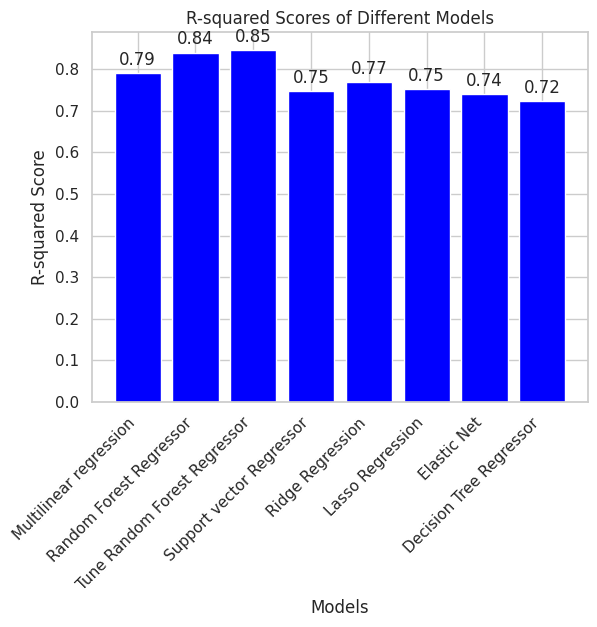

In [261]:
import matplotlib.pyplot as plt

# Assuming you have a list of results for each model
results = [
    {'model_name': 'Multilinear regression', 'r2_score': r2_poly_Reg},
    {'model_name': 'Random Forest Regressor', 'r2_score': r2_random},
    {'model_name': 'Tune Random Forest Regressor', 'r2_score':  r2_tune},
    {'model_name': 'Support vector Regressor', 'r2_score': r2_svr},
    {'model_name': 'Ridge Regression', 'r2_score': r2_ridge},
    {'model_name': 'Lasso Regression', 'r2_score': r2_lasso},
    {'model_name': 'Elastic Net', 'r2_score': r2_elastic_net},
    {'model_name': 'Decision Tree Regressor', 'r2_score': r2_dtr},
]

# Extract model names and R-squared scores
model_names = [result['model_name'] for result in results]
r2_scores = [result['r2_score'] for result in results]

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(model_names, r2_scores, color='blue')
ax.set_xlabel('Models')
ax.set_ylabel('R-squared Score')
ax.set_title('R-squared Scores of Different Models')
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with its R-squared score
for bar, r2_score in zip(bars, r2_scores):
    height = bar.get_height()
    ax.annotate(f'{r2_score:.2f}',  # Format the R-squared score with 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better placement
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


##MAE Scores For Each Model

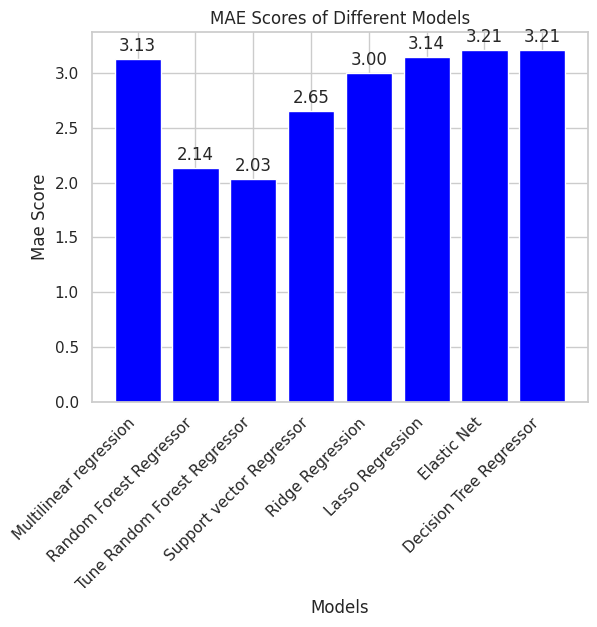

In [264]:

#results for each model
results = [
    {'model_name': 'Multilinear regression', 'mae_score': mae_poly_Reg},
    {'model_name': 'Random Forest Regressor', 'mae_score': mae_random},
    {'model_name': 'Tune Random Forest Regressor', 'mae_score':  mae_tune},
    {'model_name': 'Support vector Regressor', 'mae_score': mae_svr},
    {'model_name': 'Ridge Regression', 'mae_score': mae_ridge},
    {'model_name': 'Lasso Regression', 'mae_score': mae_lasso},
    {'model_name': 'Elastic Net', 'mae_score': mae_elastic_net},
    {'model_name': 'Decision Tree Regressor', 'mae_score': mae_dtr},
]

# Extract model names and R-squared scores
model_names = [result['model_name'] for result in results]
r2_scores = [result['mae_score'] for result in results]

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(model_names, r2_scores, color='blue')
ax.set_xlabel('Models')
ax.set_ylabel('Mae Score')
ax.set_title('MAE Scores of Different Models')
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with its R-squared score
for bar, r2_score in zip(bars, r2_scores):
    height = bar.get_height()
    ax.annotate(f'{r2_score:.2f}',  # Format the R-squared score with 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better placement
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


##MSE For Each Model

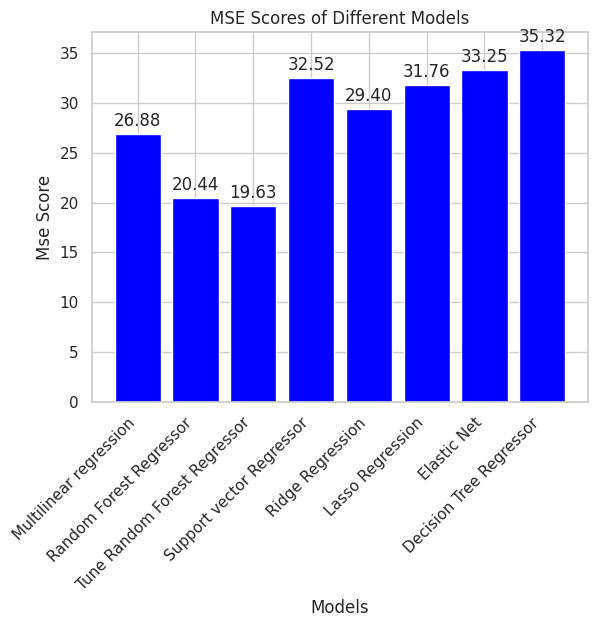

In [266]:

#results for each model
results = [
    {'model_name': 'Multilinear regression', 'Mse_score': mse_poly_Reg},
    {'model_name': 'Random Forest Regressor', 'Mse_score': mse_random},
    {'model_name': 'Tune Random Forest Regressor', 'Mse_score':  mse_tune},
    {'model_name': 'Support vector Regressor', 'Mse_score': mse_svr},
    {'model_name': 'Ridge Regression', 'Mse_score': mse_ridge},
    {'model_name': 'Lasso Regression', 'Mse_score': mse_lasso},
    {'model_name': 'Elastic Net', 'Mse_score': mse_elastic_net},
    {'model_name': 'Decision Tree Regressor', 'Mse_score': mse_dtr},
]

# Extract model names and R-squared scores
model_names = [result['model_name'] for result in results]
r2_scores = [result['Mse_score'] for result in results]

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(model_names, r2_scores, color='blue')
ax.set_xlabel('Models')
ax.set_ylabel('Mse Score')
ax.set_title('MSE Scores of Different Models')
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with its R-squared score
for bar, r2_score in zip(bars, r2_scores):
    height = bar.get_height()
    ax.annotate(f'{r2_score:.2f}',  # Format the R-squared score with 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better placement
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


##RMSE For Each Model

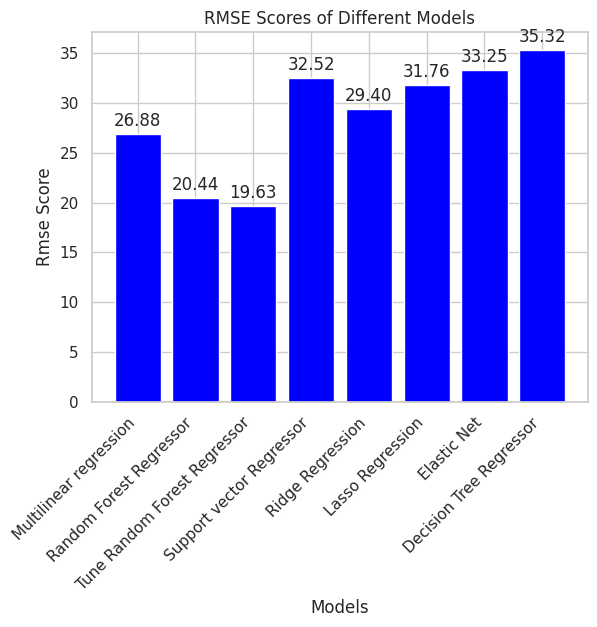

In [268]:

#results for each model
results = [
    {'model_name': 'Multilinear regression', 'rmse_score': rmse_poly_Reg},
    {'model_name': 'Random Forest Regressor', 'rmse_score': rmse_random},
    {'model_name': 'Tune Random Forest Regressor', 'rmse_score':  rmse_tune},
    {'model_name': 'Support vector Regressor', 'rmse_score': rmse_svr},
    {'model_name': 'Ridge Regression', 'rmse_score': rmse_ridge},
    {'model_name': 'Lasso Regression', 'rmse_score': rmse_lasso},
    {'model_name': 'Elastic Net', 'rmse_score': rmse_elastic_net},
    {'model_name': 'Decision Tree Regressor', 'rmse_score': rmse_dtr},
]

# Extract model names and R-squared scores
model_names = [result['model_name'] for result in results]
rmse_scores = [result['rmse_score'] for result in results]

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(model_names, r2_scores, color='blue')
ax.set_xlabel('Models')
ax.set_ylabel('Rmse Score')
ax.set_title('RMSE Scores of Different Models')
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with its R-squared score
for bar, r2_score in zip(bars, r2_scores):
    height = bar.get_height()
    ax.annotate(f'{r2_score:.2f}',  # Format the R-squared score with 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better placement
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


#Test data set

In [269]:
traindata.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Price,Brand,Model
0,9,72000,0,1,143,259,1.75,18,186
1,10,41000,1,1,39,56,12.50,10,53
2,2,46000,3,1,12,343,4.50,9,97
3,2,87000,1,1,14,345,6.00,18,68
4,3,40670,1,0,58,76,17.74,1,10


In [270]:
testdata.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Brand,Model
0,4,40929,0,1,102,163,16,16
1,3,54493,3,1,97,154,16,16
2,9,34000,1,1,67,65,26,78
3,5,139000,1,1,16,248,26,60
4,9,29000,3,1,9,211,9,159


In [271]:
traindata.shape

(5968, 9)

In [272]:
testdata.shape

(1222, 8)

In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Transforming the train and test data
x_testdata = scaler.fit_transform(testdata)

In [274]:
testpredict = model_random.predict(x_testdata)
testprediction_output=pd.DataFrame(testpredict, columns=['Predicted_Price'])
print(testprediction_output)

      Predicted_Price
0              3.2199
1              2.7079
2             15.8479
3              2.5011
4              5.7977
...               ...
1217           4.7189
1218           6.0844
1219           2.8596
1220           6.0531
1221          20.8401

[1222 rows x 1 columns]
